## __Cleaning & Analyzing Employee Exit Surveys__
The following project will involve the cleaning and evaluation of exit surveys from the Department of Education, Training and Employment (DETE) and the Technical and Further Education institue (TAFE) in Queensland, Australia.  The following are my target questions: 

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

I'll be combining both datasets in order to come to necessary conclusions.

<u>__Data Dictionary__</u>

__Columns of most interest: DETE survey__

* _ID_: An id used to identify the participant of the survey
* _SeparationType_: The reason why the person's employment ended
* _Cease Date_: The year or month the person's employment ended
* _DETE Start Date_: The year the person began employment with the DETE

__Columns of most interest: TAFE survey__
* _Record ID_: An id used to identify the participant of the survey
* _Reason for ceasing employment_: The reason why the person's employment ended
* _LengthofServiceOverall. Overall Length of Service at Institute (in years)_: The length of the person's employment (in years)




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read in surveys
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [4]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [5]:
pd.set_option('display.max_columns', None)
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [6]:
dete_survey['SeparationType'].value_counts(dropna = False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

In [7]:
dete_survey['Cease Date'].value_counts(dropna = False)

2012          344
2013          200
01/2014        43
12/2013        40
Not Stated     34
09/2013        34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
04/2013         2
08/2012         2
04/2014         2
07/2014         2
02/2014         2
2014            1
11/2012         1
07/2006         1
09/2010         1
2010            1
09/2014         1
07/2012         1
Name: Cease Date, dtype: int64

### __Initial insights (DETE survey)__

All but the following six columns are fairly well-filled (85% of values). While the _Classification_ column is missing over half of its values, the other six columns are missing the vast majority (95%+) of their data.

* _Classification_
* _Business Unit_
* _Aboriginal_
* _Torres Strait_
* _South Sea_
* _Disability_
* _NESB_

Notes on other columns:

* _SeparationType_: includes some abbreviations that could be cleaned out
* _DETE Start Date_: mixed data types (str & int), and adjust date format
* _Cease date_: figure out if the month data can be extrapolated for those only with years, or if the month data is necessary
* _Role Start Date_: mixed data types (str & int)
* _Classification_: inconsistent entries formats?
* _Professional Development_ to _Health & Safety_: unsure as to what entries mean ('A', 'N', 'M', 'D', 'SA')
* _Age_: age ranges entered (opportunity to bin?)

__General note__: shorten column names

In [8]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [9]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [10]:
tafe_survey['Reason for ceasing employment'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64

In [11]:
tafe_survey['LengthofServiceOverall. Overall Length of Service at Institute (in years)'].value_counts()

Less than 1 year      147
1-2                   102
3-4                    96
11-20                  89
More than 20 years     71
5-6                    48
7-10                   43
Name: LengthofServiceOverall. Overall Length of Service at Institute (in years), dtype: int64

In [12]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

In [13]:
tafe_survey['CurrentAge. Current Age'].value_counts()

56 or older      162
51-55             82
41  45            80
46  50            59
31  35            52
36  40            51
26  30            50
21  25            44
20 or younger     16
Name: CurrentAge. Current Age, dtype: int64

### __Initial insights (TAFE survey)__

The dataset has 72 columns, nearly all of which need to be renamed in some way to avoid the extremely long headers they currently have.  A large majority of the data is missing at 100-200 row entries (of the 702 total) - it almost seems like questions were added at later dates, as there seem to be tiered levels to the number of respondents of each question.

Notes on specific columns:

* _Record ID_: super long ID numbers necessary?
* _CESSATION YEAR_: float format (should be int)
* _CurrentAge. Current Age_: numbers should indicate the range they portray more clearly (add '-')
* _Classification. Classification_: Rename column & consider removing parenthesized information
* _LengthofServiceOverall. Overall Length of Service at Institute (in years)_: deal with binned year ranges & convert to int
* _LengthofServiceCurrent. Length of Service at current workplace (in years)_: deal with binned year ranges & convert to int

__General note__: Shorten column names and standardize data entries & formats in each column.  
                  Also, standardize the format of the data to match that in the DETE survey dataframe

In [14]:
# Reread in the data to redefine NaN values
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')
tafe_survey = pd.read_csv('tafe_survey.csv', na_values = 'Not Stated')

In [15]:
# Drop unneeded values
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

Noting that many of the NaN values in each of the datasets were noted as 'Not Stated', I decided to reread in both datasets for good measure, defining this phrase specifically as a null value.  

Additionally, there are a significant number of columns whose data is not particularly useful (or is redundant) with respect to our current questions.  Consequently, I've dropped the columns with this unhelpful data.

The following table maps out needed columns in our datasets and whether they have identical data definitions in the alternative dataframe. With this table, we can begin standardizing the response values, and eventually combine the data in the columns.


| dete_survey | tafe_survey | Definition |
| - | - | - |
|ID|Record ID|An id used to identify the participant of the survey|
|SeparationType|Reason for ceasing employment|The reason why the participant's employment ended|
|Cease Date|CESSATION YEAR|The year or month the participant's employment ended|
|DETE Start Date||The year the participant began employment with the DETE|
||LengthofServiceOverall.Overall Length of Service at Institute (in years)|The length of the person's employment (in years)|
|Age|CurrentAge.Current Age|The age of the participant|
|Gender|Gender.What is your Gender?|The gender of the participant|


In [16]:
tafe_survey_updated.head(1)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2


In [17]:
# Standardize column names across both datasets
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.lower().str.replace(' ','_')
new_tafe_cols = {'Record ID':'id', 
             'CESSATION YEAR':'cease_date', 
             'Reason for ceasing employment':'separationtype',
             'Gender.What is your Gender?':'gender', 
             'CurrentAge. Current Age':'age',
             'Employment Type. Employment Type':'employment_status',
             'Classification. Classification':'position', 
             'LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service',
             'LengthofServiceCurrent. Length of Service at current workplace (in years)':'role_service'}
tafe_survey_updated.rename(columns = new_tafe_cols, inplace = True)
# tafe_survey_updated.columns = tafe_survey_updated.columns.str.strip().str.lower().str.replace(' ','_')
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [18]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Column names have been standardized among both dataframes (dete_survey_updated and tafe_survey_updated).  Standardization includes matching column names by data definition, stripping away extra whitespace, replacing spaces with underscores, and making all column headers lowercase.

Next, I'll continue removing unnecessary data by singling out the data that will be critical to the answers we're seeking.

In [19]:
dete_survey_updated['separationtype'].value_counts(dropna = False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [20]:
tafe_survey_updated['separationtype'].value_counts(dropna = False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

In [21]:
dete_survey_updated = dete_survey_updated.replace('resignation', 'Resignation')
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation')]

In [22]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'].str.contains('Resignation', na = False)]

I've identified the various separation types, and assigned all those containing the word 'resignation' (as this is the population we're interested in) to the dete_resignations and tafe_resignations dataframes.  This isolates the population of concern so that we can work with them more easily and not worry about polluted data.

In order to make sure that there aren't any major inconsistencies within our data, I'll verify that the years in the 'cease_date' and 'dete_start_date' columns make sense.

In [23]:
dete_resignations['cease_date'].value_counts(dropna = False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
NaN         11
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
07/2012      1
2010         1
09/2010      1
Name: cease_date, dtype: int64

In [24]:
dete_resignations['cease_date']

3      05/2012
5      05/2012
8      07/2012
9         2012
11        2012
12        2012
14        2012
16        2012
20        2012
21        2012
22        2012
23        2012
25        2012
27        2012
33        2012
34        2012
37        2012
39        2012
40        2012
41        2012
42        2012
43        2012
48        2012
50        2012
51        2012
55        2012
57        2012
61        2012
69        2012
71        2012
        ...   
747    01/2014
751    12/2013
752    11/2013
753    11/2013
755    12/2013
762    07/2006
766    01/2014
769    11/2013
770        NaN
771    01/2014
774        NaN
784    10/2013
786    01/2014
788        NaN
789    01/2014
790    01/2014
791        NaN
794    11/2013
797        NaN
798        NaN
802    12/2013
803    01/2014
804    01/2014
806    12/2013
807    12/2013
808    12/2013
815    01/2014
816    01/2014
819    01/2014
821    12/2013
Name: cease_date, Length: 311, dtype: object

In [25]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(r'([20]+[0-1]+[0-9])').astype(float)
dete_resignations['cease_date'].value_counts(dropna = False)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


2013.0    146
2012.0    129
2014.0     22
NaN        11
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [26]:
dete_resignations['dete_start_date'].astype(float).value_counts(dropna = False).sort_index(ascending = False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
NaN       28
Name: dete_start_date, dtype: int64

In [27]:
tafe_resignations['cease_date'].value_counts(dropna = False).sort_index(ascending = False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
NaN         5
Name: cease_date, dtype: int64

In [28]:
dete_resignations['cease_date'].describe()

count     300.00000
mean     2012.60000
std         0.75403
min      2006.00000
25%      2012.00000
50%      2013.00000
75%      2013.00000
max      2014.00000
Name: cease_date, dtype: float64

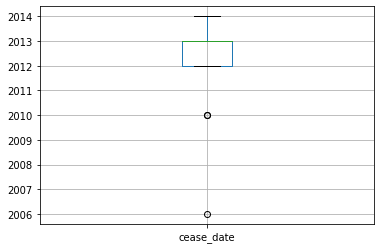

In [29]:
dete_resignations.boxplot(column = ['cease_date'])

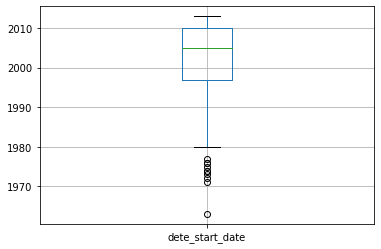

In [30]:
dete_resignations.boxplot(column = ['dete_start_date'])

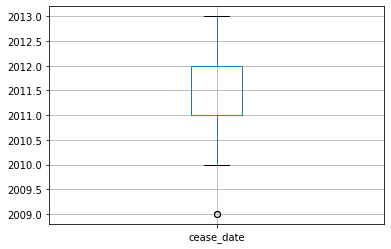

In [31]:
tafe_resignations.boxplot(column = ['cease_date'])

After looking at the boxplots, I don't see any values that are way out of line though.  Here's a bit more detail:

__Dete Resignations by cease_date__

There are a few outliers at 2006 and 2010, but the rest of the data is clustered around 2012 and 2013, with some scattered into 2014.  There are 11 NaNs in this dataset.

__Dete Resignations by dete_start_date__

There are several outliers in the 1970s (and one in the 1960s).  The remainder of the data fits into the 1980-2014 range.  The median lies start date falls on about 2006.  This column holds the largest number of NaNs at 28.

__Tafe Resignations by cease_date__

Aside from a single outlier in 2009, the data all falls within the 2010-2013 range, with the median falling at 2011.  There are 5 NaNs in this dataset.

I don't have any particular reason (i.e. support for systematic bias, etc.) to drop any of these values that are considered outliers, so I'll be leaving them alone for the moment.

In [32]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [33]:
dete_resignations['institute_service'] = dete_resignations['cease_date']-dete_resignations['dete_start_date']

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In order to answer whether or not an employee has worked at the institute for a 'short' or 'long' time, we need to determine the number of years they've worked at the institution.  Consequently, I've subtracted the _dete_start_date_ from the _cease_date_ column to create an _'institute_service'_ column, which contains the number of years they've worked at the institute.

The Tafe dataset doesn't have a 'dete_start_date' column.

Now, I'll filter by various forms of 'dissatisfaction' as noted throughout the dataset.  As organized by dataset, they are as follows:

* tafe_survey_updated:
    * Contributing Factors. Dissatisfaction
    * Contributing Factors. Job Dissatisfaction
* dafe_survey_updated:
    * job_dissatisfaction
    * dissatisfaction_with_the_department
    * physical_work_environment
    * lack_of_recognition
    * lack_of_job_security
    * work_location
    * employment_conditions
    * work_life_balance
    * workload

Each of these columns contain binary data, so I'll filter by whether or not 'True' or 'False' is located in the column.


In [34]:
tafe_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 23 columns):
id                                                     340 non-null float64
Institute                                              340 non-null object
WorkArea                                               340 non-null object
cease_date                                             335 non-null float64
separationtype                                         340 non-null object
Contributing Factors. Career Move - Public Sector      332 non-null object
Contributing Factors. Career Move - Private Sector     332 non-null object
Contributing Factors. Career Move - Self-employment    332 non-null object
Contributing Factors. Ill Health                       332 non-null object
Contributing Factors. Maternity/Family                 332 non-null object
Contributing Factors. Dissatisfaction                  332 non-null object
Contributing Factors. Job Dissatisfaction              332 non-null 

In [35]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna = False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [36]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna = False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [37]:
def update_vals(series):
    if series == '-':
        return False
    if pd.isnull(series):
        return np.nan
    else:
        return True
# Pass the update_vals function to applymap _without_ the parentheses!
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 
                                                       'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna = False)
tafe_resignations_up = tafe_resignations.copy()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [38]:
tafe_resignations_up['dissatisfied'].value_counts(dropna = False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [39]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction', 
                                                       'dissatisfaction_with_the_department',
                                                       'physical_work_environment', 
                                                       'lack_of_recognition', 
                                                       'lack_of_job_security', 
                                                       'work_location', 
                                                       'employment_conditions', 
                                                       'work_life_balance', 
                                                       'workload']].any(1, skipna = False)
dete_resignations_up = dete_resignations.copy()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [40]:
dete_resignations_up['dissatisfied'].value_counts(dropna = False)

False    162
True     149
Name: dissatisfied, dtype: int64

I first evaluated a few of the columns to determine the types of dissatisfaction values in the columns.  I created a new column in each dataframe, _'dissatisfied'_, and assigned a value of True, False, or NaN to based on the boolean values of those columns listed in the markdown cell listed above.  In other words, for the __tafe_resignations dataset__, I looked at the _'Contributing Factors. Dissatisfaction'_ column, and where I found a value '-', I assigned False, NaN, I assigned NaN, and for 'Contributing Factors. Dissatisfaction', I assigned True.  I did the same for the _'Contributing Factors. Job Dissatisfaction'_ column in the tafe dataset, and several columns (listed above) in teh dete_resignations dataset.  This leaves me with a column indicating whether or not each/most employees were satisfied or dissatisfied at the end of their employment.

Now, I'll finalize the preparation needed to combine the datasets.

In [41]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [42]:
dete_resignations_up.head(2)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied,institute
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False,DETE
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True,DETE


In [43]:
tafe_resignations_up.head(2)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,age,employment_status,position,institute_service,role_service,dissatisfied,institute
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False,TAFE
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE


In [44]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index = True)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [45]:
combined.notnull().sum().sort_values(ascending = True)

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
Gender. What is your Gender?                           290
role_service                                           290
gender                                                 302
none_of_the_above                                      311
maternity/family                                       311
physical_work_environment                              311
lack_of_recognition                                    3

In [46]:
combined_updated = combined.dropna(thresh = 500, axis = 1)
combined_updated.notnull().sum().sort_values(ascending = True)

institute_service    563
age                  596
employment_status    597
position             598
cease_date           635
dissatisfied         643
id                   651
institute            651
separationtype       651
dtype: int64

The datasets are now concatenated.  I chose to concatenate the records, as each row correlates to a separate individual.  I then dropped any column that had more than 500 null values, which left us with the current set of 9 columns.  The _'institute'_ column is a dummy column indicating whether the data came from DETE or TAFE.

In [47]:
combined_updated['institute_service'].value_counts(dropna = False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
12.0                   6
22.0                   6
17.0                   6
10.0                   6
14.0                   6
18.0                   5
16.0                   5
23.0                   4
24.0                   4
11.0                   4
39.0                   3
21.0                   3
32.0                   3
19.0                   3
36.0                   2
30.0                   2
26.0                   2
28.0                   2
25.0                   2


[This article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage) argues that it's better to understand employees needs in consideration of their career stage instead of their age.  Consequently, I'll be putting each employee into one of four categories, as follows, to set up our analysis:

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company


In [48]:
# Change the data type to a string and use regex to extract the values
pattern = r'(\d+)'
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype(str).str.extract(pattern)
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype(float)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [49]:
# Double check I didn't miss any extracting digits
combined_updated['institute_service'].value_counts(dropna = False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
12.0                   6
22.0                   6
17.0                   6
10.0                   6
14.0                   6
18.0                   5
16.0                   5
23.0                   4
24.0                   4
11.0                   4
39.0                   3
21.0                   3
32.0                   3
19.0                   3
36.0                   2
30.0                   2
26.0                   2
28.0                   2
25.0                   2


In [50]:
def map_func(val):
    if pd.isnull(val):
        return np.nan
    if val < 3:
        return 'new'
    elif 3 <= val <= 6:
        return 'experienced'
    elif 7 <= val <= 10:
        return 'established'
    else:
        return 'veteran'
    
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(map_func)
combined_updated['service_cat'].value_counts(dropna = False)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


new            193
experienced    172
veteran        136
NaN             88
established     62
Name: service_cat, dtype: int64

I used a regular expression to draw out the numbers from the each of the entries in the _'institute_service'_ column.  For those in a range, the first of the two numbers was taken (i.e. '1-2 years' == 1 year).  Admittedly, it would probably be nicer to take the average of the timeframe (because it's not always a single year), but this will do for exploratory analysis.

I then assigned each value to a category, as outlined above, and assigned all the categories to the _'service_cat'_ column.

In [51]:
combined_updated['dissatisfied'].value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [52]:
# Drop rows with NaN values(?)
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [53]:
dis_pct = combined_updated.pivot_table(index = 'service_cat', values = 'dissatisfied')
# dis_pct = combined_updated.pivot_table(index = 'service_cat', columns = 'dissatisfied', values = 'institute_service')

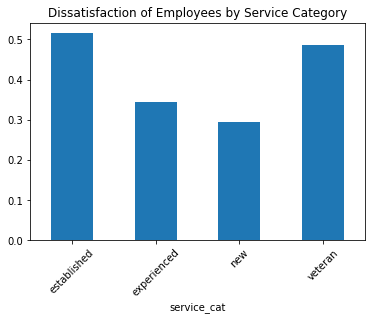

In [54]:
dis_pct.plot(kind = 'bar', rot = 45, title = 'Dissatisfaction of Employees by Service Category', legend = False)

# __Analysis__
As a reminder of the boundaries for each category in the plot above: 

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

So, from the graph above, we learn that established and veteran employees are more likely to resign due to dissatisfaction than are new and experienced workers.  New employees, in fact, leave employment due to dissatisfaction at a rate roughly 20% lower than those in the 'established' and 'veteran' categories.

As the dissatisfaction apears to be correlated with time at the company, it may be worth considering how the company has changed over the last 7+ years.  This may provide insight into why those in the 'established' and 'veteran' categories are dissatisfied.  Alternatively, the dissatisfaction may come on a more personal level (i.e. progress at work, as opposed to institutional factors).  This could be a second avenue to pursue for further investigation.

Let's take a look at the dissatisfaction among employees by age group.

In [55]:
combined_updated['age'].value_counts(dropna = False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
26  30           32
31  35           32
56 or older      29
31-35            29
21-25            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [56]:
combined_updated['age_updated'] = combined_updated['age'].str.replace('  ', '-')
# Combined the '56 or older', '56-60', and '61 or older' groups into a single group labeled 56+.  This is because it's impossible to separate out each of the ages in these groups.
combined_updated['age_updated'] = combined_updated['age_updated'].str.replace('56 or older','56+').str.replace('56-60','56+').str.replace('61 or older','56+')
# Shorten the naming convention of the '20 or younger' column
combined_updated['age_updated'] = combined_updated['age_updated'].str.replace('20 or younger', '<20')
combined_updated['age_updated'].value_counts(dropna = False)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

41-45    93
46-50    81
56+      78
36-40    73
51-55    71
26-30    67
21-25    62
31-35    61
NaN      55
<20      10
Name: age_updated, dtype: int64

In [57]:
# Create a list to define the order of values presented on the x-axis
order = ['<20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56+']

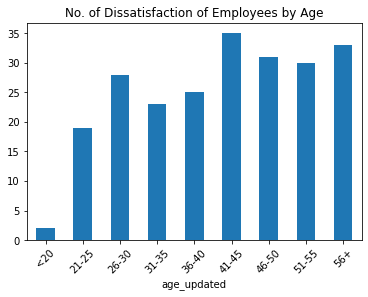

In [58]:
dis_pct_age = combined_updated.pivot_table(index = 'age_updated', values = 'dissatisfied', aggfunc = np.sum)
# Implement the ordered list above in the plot
age_plot = dis_pct_age.loc[order].plot(kind = 'bar', rot = 45, title = 'No. of Dissatisfaction of Employees by Age', legend = False)

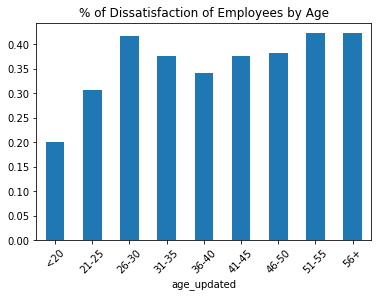

In [59]:
dis_pct_age = combined_updated.pivot_table(index = 'age_updated', values = 'dissatisfied')
# Implement the ordered list above in the plot
age_plot = dis_pct_age.loc[order].plot(kind = 'bar', rot = 45, title = '% of Dissatisfaction of Employees by Age', legend = False)

## __Further Discussion__
Here, we see that the Employee Dissatisfaction is lower for those 25 and under, but for those over 25, it remains higher.  It looks like, without the 26-30, and 31-35 groups, there would have been a positive trend as age increases, but the members of these two groups disrupt (invalidate?) this possible trend.  As experience often correlates well with age, it's fair to say that older employees resign due to dissatisfaction more often than younger employees.  

Another possiblity is that older individuals may be more likely to 'speak their mind'.  In other words, older or more experienced employees might submit the real reason for their departure from employment.  They may anticipate not ever coming back to the company, whereas  younger folks (assuming they believe that these surveys stay with HR and could impact future employment) may want to leave the door open.  A label of 'dissatisfaction' with the company could appear more injurious to future employment than a label of, say, 'new opportunities'.

One thing not considered above is how many null values aren't being considered.  There were 88 nulls in the _'service_cat'_ column, and 55 _'age_updated'_ column.  So, there could be as many as 55 null values that we could reap data from by categorizing their service_cat with a rough approximation of their age.  Let's see how  many rows have both a value in the _'service_cat'_ column, but not in the _'age_updated'_ column and vice-versa.

In [60]:
combined_updated['service_cat'].value_counts(dropna = False)

new            193
experienced    172
veteran        136
NaN             88
established     62
Name: service_cat, dtype: int64

In [61]:
combined_updated['age_updated'].value_counts(dropna = False)

41-45    93
46-50    81
56+      78
36-40    73
51-55    71
26-30    67
21-25    62
31-35    61
NaN      55
<20      10
Name: age_updated, dtype: int64

In [62]:
combined_updated['age_updated'].groupby(combined_updated['service_cat'].isnull()).value_counts(dropna = False)

service_cat  age_updated
False        41-45          89
             46-50          73
             51-55          69
             56+            69
             36-40          68
             26-30          63
             31-35          61
             21-25          59
             <20            10
             NaN             2
True         NaN            53
             56+             9
             46-50           8
             36-40           5
             26-30           4
             41-45           4
             21-25           3
             51-55           2
Name: age_updated, dtype: int64

In [63]:
# How many NaNs from the 'service_cat' column have an 'age_updated' associated with the row?
combined_updated['service_cat'].groupby(combined_updated['age_updated'].isnull()).value_counts(dropna = False)

age_updated  service_cat
False        new            192
             experienced    172
             veteran        135
             established     62
             NaN             35
True         NaN             53
             new              1
             veteran          1
Name: service_cat, dtype: int64

Now, we have a more accurate picture of the situation.  There are 35 rows with a null value in the _'service_cat'_ column that have an age listed in the _'age_updated'_ column.  There are also 53 rows with null values in both the _'age_updated'_ and _'service_cat'_.  Therefore, we could potentially secure 35 new values for our analysis, but as this would only be represent an increase of 6.24% over the current number of values, and in light of the possibility that a portion of those 35 could have made mid-life career changes from other industries, the benefit does not outweigh the work.  I'll drop the 53 null values for now that have neither age or service category, leaving the other 35 values for analysis as they have at least an age.

In [64]:
combined_updated['service_cat'].groupby(combined_updated['age_updated'].isnull()).value_counts(dropna = False)

age_updated  service_cat
False        new            192
             experienced    172
             veteran        135
             established     62
             NaN             35
True         NaN             53
             new              1
             veteran          1
Name: service_cat, dtype: int64

In [65]:
combined_updated.dropna(subset = ['service_cat', 'age_updated'], inplace = True, thresh = 1)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [68]:
# Confirming values dropped
combined_updated['service_cat'].groupby(combined_updated['age_updated'].isnull()).value_counts(dropna = False)

age_updated  service_cat
False        new            192
             experienced    172
             veteran        135
             established     62
             NaN             35
True         new              1
             veteran          1
Name: service_cat, dtype: int64